In [ ]:
!pip install -q deepface


In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
from deepface import DeepFace


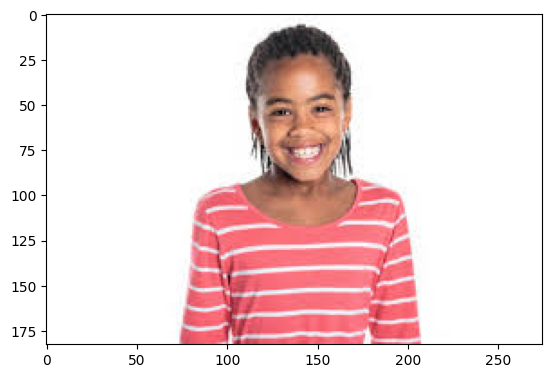

In [ ]:
# read the image from location and store
# it in the form of an array
img = cv2.imread("sample.jpg")
# call imshow() using plt object and display the image
plt.imshow(img[:, :, :: -1])
# ensures that the image is displayed
plt.show()


In [ ]:
# storing the dictionary of emotions in result
result = DeepFace.analyze(img, actions = ['emotion'])
# print result
print(result)


[{'emotion': {'angry': 2.9136648649341623e-07, 'disgust': 5.948191245108703e-09, 'fear': 0.0001331819134975376, 'happy': 99.91651773452759, 'sad': 1.171632035834591e-06, 'surprise': 2.565717807101464e-05, 'neutral': 0.0833288999274373}, 'dominant_emotion': 'happy', 'region': {'x': 110, 'y': 28, 'w': 64, 'h': 64, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.92}]


In [ ]:
# extracting emotion with highest percentage
query = str(max(zip(result[0]['emotion'].values(),
					result[0]['emotion'].keys()))[1])
print(query)


happy


In [ ]:
import pandas as pd

# Load the dataset
# Replace 'data_moods.csv' with the actual path to your CSV file
dataset = pd.read_csv('/content/data_moods.csv')

def recommend_music_by_mood(mood, limit=10):
    # Filter the dataset based on the input mood
    filtered_dataset = dataset[dataset['mood'] == mood]

    if filtered_dataset.empty:
        return "No songs found for the given mood."

    # Select up to 10 random songs from the filtered dataset
    recommended_songs = filtered_dataset.sample(n=min(limit, len(filtered_dataset)))

    # Create a list to store recommended song details
    recommended_song_list = []

    # Iterate over recommended songs and add details to the list
    for index, song in recommended_songs.iterrows():
        song_details = {
            "Name": song['name'],
            "Artist": song['artist'],
            "Album": song['album'],
            "Mood": song['mood']
        }
        recommended_song_list.append(song_details)

    return recommended_song_list

# Example usage:
input_mood = "Happy"  # Replace with the desired mood
recommended_songs = recommend_music_by_mood(input_mood, limit=10)

if isinstance(recommended_songs, str):
    print(recommended_songs)
else:
    print("Recommended Songs:")
    for song in recommended_songs:
        print(song)



Recommended Songs:
{'Name': 'Good Times', 'Artist': 'CHIC', 'Album': 'Risqué', 'Mood': 'Happy'}
{'Name': 'Lola - Live at Providence Civic Center, Providence, RI - September 1979', 'Artist': 'The Kinks', 'Album': 'One for the Road (Live)', 'Mood': 'Happy'}
{'Name': 'All or Nothing (feat. Axel Ehnström) - Deluxe Mix', 'Artist': 'Lost Frequencies', 'Album': 'Less is More (Deluxe)', 'Mood': 'Happy'}
{'Name': 'Highway to Hell', 'Artist': 'AC/DC', 'Album': 'Highway to Hell', 'Mood': 'Happy'}
{'Name': 'Freya', 'Artist': 'Dave Pad', 'Album': 'Cantec De Leagane / Freya', 'Mood': 'Happy'}
{'Name': 'Beautiful Life', 'Artist': 'Lost Frequencies', 'Album': 'Beautiful Life', 'Mood': 'Happy'}
{'Name': 'Siren Song - Radio Edit', 'Artist': 'CamelPhat', 'Album': 'Siren Song', 'Mood': 'Happy'}
{'Name': 'Mad About You', 'Artist': 'Hooverphonic', 'Album': 'The Magnificent Tree', 'Mood': 'Happy'}
{'Name': 'Reality', 'Artist': 'Chocolate Puma', 'Album': 'Reality EP', 'Mood': 'Happy'}
{'Name': 'Bennie And The